<a href="https://colab.research.google.com/github/seyeon1202/oss/blob/main/%EA%B3%BC%EC%A0%9C5_2344240_%EC%9E%84%EC%84%B8%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Selection 0.005483984888300029
Bubble 0.008200972615400044
Insertion 0.003878842722600018
Merge 0.0009483160407996536
Quick 0.0003095992378998346
Heap 0.0013947085113994945
Shell 0.0006058275230995833


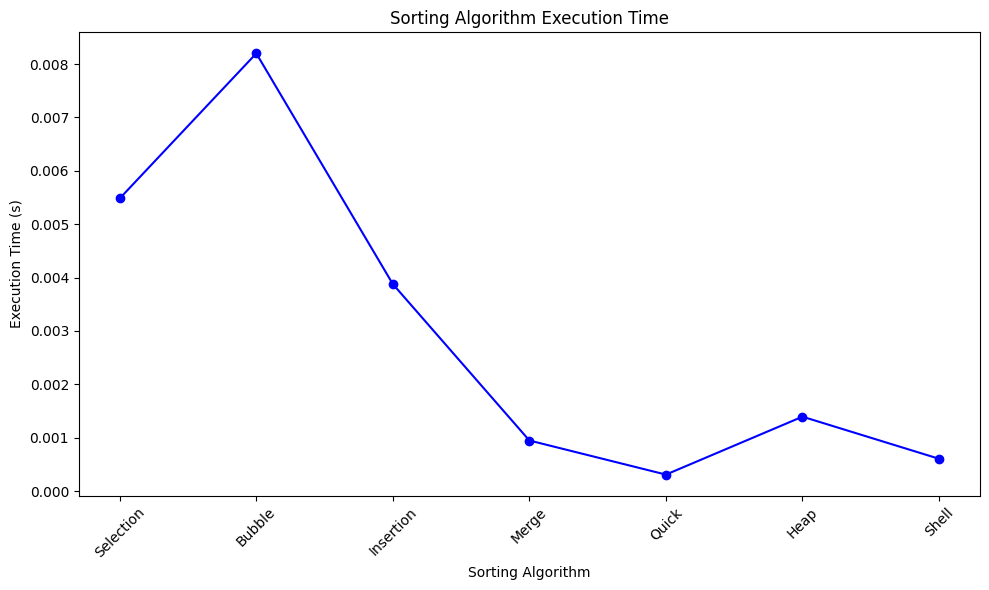

In [ ]:
import random  # 난수 생성을 위한 모듈 import
import time  # 시간 측정을 위한 모듈 import
import matplotlib.pyplot as plt  # 그래프 생성을 위한 모듈 import
import sys  # 시스템 설정을 위한 모듈 import

# 퀵 정렬의 재귀 깊이 설정
sys.setrecursionlimit(10**6)

# 선택 정렬
def selection_sort(arr):
    n = len(arr)                                        # 배열의 길이를 변수 n에 저장
    for i in range(n):                                  # 배열의 첫 번째 요소부터 마지막 요소까지 반복
        min_idx = i                                     # 현재 위치 i를 최소값 인덱스로 초기화
        for j in range(i+1, n):                         # 현재 위치 i 이후의 요소들에 대해 반복
            if arr[j] < arr[min_idx]:                   # 현재 최소값 인덱스의 요소보다 j번째 요소가 더 작으면
                min_idx = j                             # 최소값 인덱스를 j로 업데이트
        arr[i], arr[min_idx] = arr[min_idx], arr[i]     # 현재 위치 i의 요소와 최소값 위치 요소를 교환
    return arr                                          # 정렬된 배열을 반환

# 버블 정렬
def bubble_sort(arr):
    n = len(arr)                                        # 배열의 길이를 변수 n에 저장
    for i in range(n):                                  # 배열 전체를 반복, 이미 정렬된 부분을 제외하고 반복 횟수를 줄임
        for j in range(0, n-i-1):                       # 배열의 처음부터 아직 정렬되지 않은 마지막 요소까지 반복
            if arr[j] > arr[j+1]:                       # 현재 요소가 다음 요소보다 크다면
                arr[j], arr[j+1] = arr[j+1], arr[j]     # 두 요소의 위치를 바꿈 (스왑)
    return arr                                          # 정렬된 배열을 반환

# 삽입 정렬
def insertion_sort(arr):
    for i in range(1, len(arr)):                        # 배열의 두 번째 요소부터 마지막 요소까지 반복
        key = arr[i]                                    # 현재 삽입할 요소를 변수 key에 저장
        j = i - 1                                       # 현재 요소의 바로 이전 요소를 가리키는 변수 j
        while j >= 0 and key < arr[j]:                  # j가 0 이상이고 key가 arr[j]보다 작은 동안 반복
            arr[j + 1] = arr[j]                         # 현재 요소 arr[j]를 오른쪽으로 한 칸 이동
            j -= 1                                      # j를 왼쪽으로 한 칸 이동
        arr[j + 1] = key                                # key를 올바른 위치에 삽입
    return arr                                          # 정렬된 배열을 반환


# 병합 정렬 (최적화)
def merge_sort(arr):
    if len(arr) <= 1:                                   # 배열의 길이가 1 이하이면 이미 정렬된 상태이므로 그대로 반환
        return arr

    mid = len(arr) // 2                                 # 배열을 반으로 나눌 중간 인덱스 계산
    L = merge_sort(arr[:mid])                           # 왼쪽 부분 배열을 재귀적으로 정렬
    R = merge_sort(arr[mid:])                           # 오른쪽 부분 배열을 재귀적으로 정렬

    sorted_arr = []                                     # 병합된 결과를 저장할 새로운 배열
    i = j = 0                                           # 왼쪽(L)와 오른쪽(R) 배열의 현재 인덱스를 초기화

    while i < len(L) and j < len(R):                    # 왼쪽 배열과 오른쪽 배열의 요소들을 비교하며 병합
        if L[i] < R[j]:                                 # 왼쪽 배열의 현재 요소가 오른쪽 배열의 현재 요소보다 작으면
            sorted_arr.append(L[i])                     # 왼쪽 배열의 요소를 결과 배열에 추가
            i += 1                                      # 왼쪽 배열의 인덱스를 1 증가
        else:
            sorted_arr.append(R[j])                     # 오른쪽 배열의 요소를 결과 배열에 추가
            j += 1                                      # 오른쪽 배열의 인덱스를 1 증가

    sorted_arr.extend(L[i:])                            # 왼쪽 배열에 남은 요소들을 결과 배열에 추가
    sorted_arr.extend(R[j:])                            # 오른쪽 배열에 남은 요소들을 결과 배열에 추가

    return sorted_arr                                   # 정렬된 배열을 반환


# 퀵 정렬 (최적화)
def quick_sort(arr):
    if len(arr) <= 1:                                   # 배열의 길이가 1 이하이면 이미 정렬된 상태이므로 그대로 반환
        return arr

    pivot = arr[len(arr) // 2]                          # 배열의 중간 요소를 피벗으로 선택
    left, middle, right = [], [], []                    # 왼쪽, 중간, 오른쪽 배열을 초기화

    for x in arr:                                       # 배열의 각 요소에 대해 반복
        if x < pivot:                                   # 현재 요소가 피벗보다 작으면
            left.append(x)                              # 왼쪽 배열에 추가
        elif x == pivot:                                # 현재 요소가 피벗과 같으면
            middle.append(x)                            # 중간 배열에 추가
        else:                                           # 현재 요소가 피벗보다 크면
            right.append(x)                             # 오른쪽 배열에 추가

    # 왼쪽 배열과 오른쪽 배열을 재귀적으로 정렬한 후 병합
    return quick_sort(left) + middle + quick_sort(right)  # 정렬된 배열을 반환

# 힙 구조 재배열
def heapify(arr, n, i):
    largest = i                                         # 현재 서브트리의 루트를 최대값으로 가정
    l = 2 * i + 1                                       # 왼쪽 자식 노드의 인덱스 계산
    r = 2 * i + 2                                       # 오른쪽 자식 노드의 인덱스 계산

    # 왼쪽 자식 노드가 루트보다 크다면 largest 업데이트
    if l < n and arr[i] < arr[l]:
        largest = l

    # 오른쪽 자식 노드가 현재 largest보다 크다면 largest 업데이트
    if r < n and arr[largest] < arr[r]:
        largest = r

    # 만약 largest가 루트가 아니라면
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]     # 루트와 largest를 교환
        heapify(arr, n, largest)                        # 재귀적으로 영향을 받은 서브트리 힙화

# 힙 정렬
def heap_sort(arr):
    n = len(arr)                                        # 배열의 길이 저장
    # 배열을 힙으로 변환
    for i in range(n // 2 - 1, -1, -1):                 # 배열의 중간부터 시작하여 루트까지 반복
        heapify(arr, n, i)                              # 최대 힙을 구성

    # 하나씩 요소를 힙에서 추출
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]                 # 현재 루트(최대값)를 배열의 끝으로 보냄
        heapify(arr, i, 0)                              # 힙의 나머지 부분을 다시 힙화
    return arr                                          # 정렬된 배열을 반환

# 쉘 정렬
def shell_sort(arr):
    n = len(arr)                                        # 배열의 길이를 변수 n에 저장
    gap = n // 2                                        # 초기 간격을 배열 길이의 절반으로 설정

    while gap > 0:                                      # 간격이 0보다 클 때까지 반복
        for i in range(gap, n):                         # 간격부터 배열의 끝까지 반복
            temp = arr[i]                               # 현재 요소를 변수 temp에 저장
            j = i                                       # 현재 인덱스를 변수 j에 저장
            # 현재 요소를 간격만큼 왼쪽의 요소들과 비교하며 정렬
            while j >= gap and arr[j - gap] > temp:     # 간격만큼 이동하며 요소 비교
                arr[j] = arr[j - gap]                   # 간격만큼 왼쪽의 요소를 현재 위치로 이동
                j -= gap                                # 인덱스를 간격만큼 왼쪽으로 이동
            arr[j] = temp                               # 현재 요소를 적절한 위치에 삽입
        gap //= 2                                       # 간격을 절반으로 줄임
    return arr                                          # 정렬된 배열을 반환

# 정렬시간 측정
def get_execute_time(sortFunc):
    result = 0
    # 10000번 반복하여 평균 실행 시간 측정
    for _ in range(10000):
        A = [random.randint(0, 99) for _ in range(300)] # 크기가 300인 배열을 랜덤으로 생성

        start = time.perf_counter()                     # 시간 측정 시작
        sorted_A = sortFunc(A.copy())                   # 복사본을 사용하여 원본 리스트 유지
        end = time.perf_counter()                       # 시간 측정 종료

        result += (end - start)                         # 실행 시간 누적

    result /= 10000                                     # 평균 실행 시간 계산

    return result

if __name__ == "__main__":
    # 각 정렬 알고리즘의 이름
    funcName = ["Selection", "Bubble", "Insertion", "Merge", "Quick", "Heap", "Shell"]
    # 정렬 함수 리스트
    funcs = [selection_sort, bubble_sort, insertion_sort, merge_sort,
             quick_sort, heap_sort, shell_sort]         # 정렬 함수 리스트

    # 실행 시간을 저장할 리스트 초기화
    execute_times = []

    # 각 정렬 함수에 대해 실행 시간을 측정하고 저장
    for i, func in enumerate(funcs):
        execute_times.append(get_execute_time(func))    # 정렬 함수의 실행 시간 측정
        print(funcName[i], execute_times[i])            # 각 정렬 알고리즘의 실행 시간 출력

    # 그래프 생성
    plt.figure(figsize=(10, 6))
    plt.plot(funcName, execute_times, marker='o', linestyle='-', color='b', label='Execution Time (s)')
    plt.xlabel('Sorting Algorithm')                     # x축 레이블
    plt.ylabel('Execution Time (s)')                    # y축 레이블
    plt.title('Sorting Algorithm Execution Time')       # 그래프 제목
    plt.xticks(rotation=45)                             # x축 레이블 회전
    plt.tight_layout()                                  # 그래프 레이아웃 조정
    plt.show()                                          # 그래프 출력

# 정렬 알고리즘의 실행 시간 차이가 나는 이유

1. 선택 정렬
- 시간 복잡도 : O(n^2)
- 가장 큰 값을 선택하여 앞으로 보내는 방식으로 동작합니다. 배열의 크기가 커질수록 비효율적인 알고리즘이기 때문에 실행 시간이 길 수 있습니다.

2. 버블 정렬
- 시간 복잡도: O(n^2)
- 인접한 두 요소를 비교하여 필요에 따라 교환하는 방식으로 동작합니다. 선택 정렬과 유사한 특성을 가지고 있어 비슷한 실행 시간을 가질 수 있습니다.

3. 삽입 정렬
- 시간 복잡도: O(n^2)
- 배열의 요소를 하나씩 가져와 이미 정렬된 부분에 삽입하는 방식으로 동작합니다. 배열이 이미 정렬되어 있는 경우에는 효율적으로 동작하지만, 무작위로 섞인 배열의 경우에는 비교적 느릴 수 있습니다.

4. 병합 정렬
- 시간 복잡도: O(n log n)
- 분할 정복 알고리즘 중 하나로, 배열을 반으로 나누어 각각을 정렬한 후 병합하는 방식으로 동작합니다. 효율적인 정렬 알고리즘 중 하나이며, 입력 데이터의 크기에 상관없이 일정한 실행 시간을 보입니다.

5. 퀵 정렬
- 시간 복잡도: O(n log n) - 최악의 경우 O(n^2)
- 피벗을 기준으로 작은 요소는 왼쪽으로, 큰 요소는 오른쪽으로 분할한 후 재귀적으로 정렬하는 방식으로 동작합니다. 피벗의 선택 방법에 따라 실행 시간이 달라질 수 있으며, 최악의 경우 정렬 속도가 떨어질 수 있습니다.

6. 힙 정렬
- 시간 복잡도: O(n log n)
- 최대 힙 구조를 활용하여 정렬하는 방식으로, 배열을 힙으로 만든 후 최대값을 루트로 옮기고 힙을 재구성하는 과정을 반복합니다. 효율적인 정렬 알고리즘 중 하나입니다.

7. 쉘 정렬
- 시간 복잡도: 보통 O(n log n) 이하
- 간격을 조정하여 부분 리스트를 만들어 삽입 정렬을 수행하는 방식입니다. 입력 데이터의 초기 정렬 상태에 따라 실행 시간이 달라질 수 있습니다.


# 분석 요약
1. 알고리즘의 작동 방식이 중요한 역할을 합니다. 각 정렬 알고리즘이 사용하는 방식은 다양합니다. 선택 정렬과 버블 정렬은 각 요소를 비교하고 필요에 따라 위치를 변경하는 방식으로 동작합니다. 이는 배열의 크기가 커질수록 비효율적인 결과를 낳을 수 있습니다. 반면에, 퀵 정렬과 병합 정렬은 분할 정복 알고리즘을 사용하여 효율적으로 정렬을 수행합니다.

2. 비교 및 이동 연산의 횟수가 실행 시간에 큰 영향을 미칩니다. 각 정렬 알고리즘은 정렬되지 않은 데이터에 대해 수행하는 비교 및 이동 연산의 횟수가 다릅니다. 삽입 정렬은 이미 정렬된 데이터에 대해선 적은 연산을 수행하지만, 정렬되지 않은 데이터에 대해서는 많은 연산을 필요로 합니다.

3. 입력 데이터의 초기 상태도 실행 시간에 영향을 미칩니다. 이미 정렬된 데이터나 거의 정렬된 데이터에 대해서는 삽입 정렬이나 버블 정렬과 같은 알고리즘이 효율적입니다. 그러나 무작위로 섞인 데이터에 대해서는 퀵 정렬과 같은 분할 정복 알고리즘이 효율적입니다.

이러한 점들을 종합적으로 고려하여 적절한 정렬 알고리즘을 선택하는 것이 중요합니다.


선택 정렬은 단순하지만 비효율적이며, 요소 교환 횟수가 적어 버블 정렬보다 나은 성능을 보일 수 있습니다. 버블 정렬은 인접 요소 비교 및 교환이 많아 비효율적입니다. 삽입 정렬은 거의 정렬된 배열에 대해 매우 효율적입니다.
병합 정렬과 퀵 정렬은 대규모 데이터에 적합하며, 평균적으로 높은 성능을 보입니다.힙 정렬은 안정적이고 메모리 효율성이 높아 큰 데이터 정렬에 유리합니다.셸 정렬은 간격 선택에 따라 성능이 달라지며, 효율적인 정렬을 제공합니다.